# Working with GIS data in python
`geopandas` is a library that extends `pandas` in python for spatial data

## Reproducible file paths
Let's import the packages we will be working with:

os = operating system
- it works for file navigation code that is platform independent, for reproducibility 
- basically an equivalent to the `here` package in rstudio

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
fp = os.path.join('data','gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')

We can use this filepath to import the shapefile using the `geopandas.read_file()` function:

In [7]:
pigs = gpd.read_file(fp)
pigs

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## Check in 
Create a file path for CA boundary and import as `ca_boundary`

In [9]:
ca = os.path.join('data','ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(ca)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

geometry column = `gpd.GeoSeries` it holds the geomtery of each spatial feature

In [11]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [13]:
# Check what kind of object is pigs
print(type(pigs))

# Check what kind of object is the geometry column
print(type(pigs.geometry))

# Check what kind of object is the species columns
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the vlaues in each column:

In [15]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [16]:
# Check the geometry typ eof each element in the geometry column

In [17]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Check-in
What is the geometry type of the single feature in the CA State boundary

In [18]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extent

In [19]:
# Access the CRS 

In [20]:
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
ca_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
ca_boundary.crs == pigs.crs

True

In [25]:
# Get more information about our CRS

In [31]:
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic: ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic:  True
is projected?  False


- What are the ellipsoid and the datum 
- What does it mean that the CRS is geographic and not projected

The extent of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. 

Use this:
- to help find reference of where to get other layers (like raster data) that cover the area

In [38]:
# Obtain the geographic extent of the dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [37]:
print('CRS: ',ca_boundary.crs)
print('Extent: ', ca_boundary.total_bounds)
print('Are the CRS for ca and pigs the same?', ca_boundary.crs == pigs.crs)

CRS:  epsg:4326
Extent:  [-124.48201686   32.52883674 -114.13122248   42.00950827]
Are the CRS for ca and pigs the same? True


## Data wrangling

Since `geopandas` is built on top of pandas we can use everything about pandas re: data selection and wrangling

Example subset by year:

In [42]:
# Examine count by year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [43]:
# Select data by year
pigs_recent = pigs[pigs.year >= 2020]

In [45]:
# Check length of dataframes
print('Total number of observations ', len(pigs))

print('Number of observations since 2020: ', len(pigs_recent))

Total number of observations  1046
Number of observations since 2020:  606


## Create a map
geo-dataframes also have a `plot()` method that we can call to make a quick map

<AxesSubplot:>

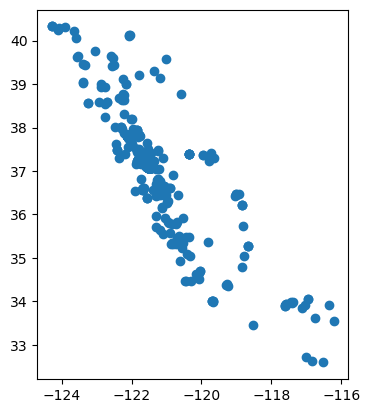

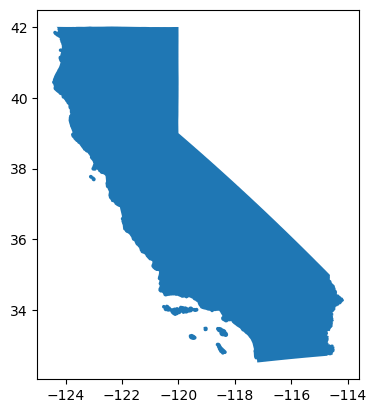

In [47]:
pigs_recent.plot()
ca_boundary.plot()

#### `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a **figure** that can have one or more **axes** (plots within a figure)

The **axes** are only the area specified by a pair of x,y. and what is plotted in it

To create a figure:


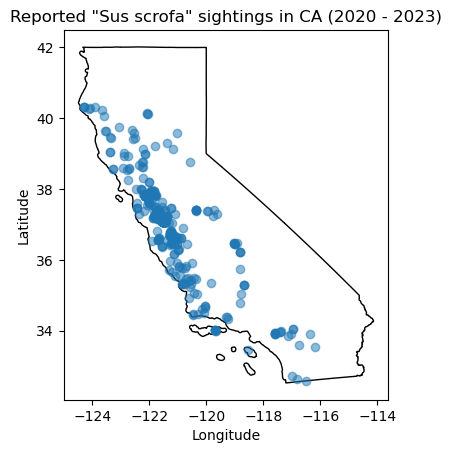

In [57]:
# 1) initialize a blank figure and axes
fig, ax = plt.subplots()

# Add layers to our figures axis
ca_boundary.plot(ax=ax,
                color = 'none',
                edgecolor = 'black')
pigs_recent.plot(ax=ax,
                alpha=0.5)

# Customization
ax.set_title('Reported "Sus scrofa" sightings in CA (2020 - 2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the figure
plt.show()